In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Graficos para los tamaños de avalancha (size), columna 2 de los ficheros AdditionData

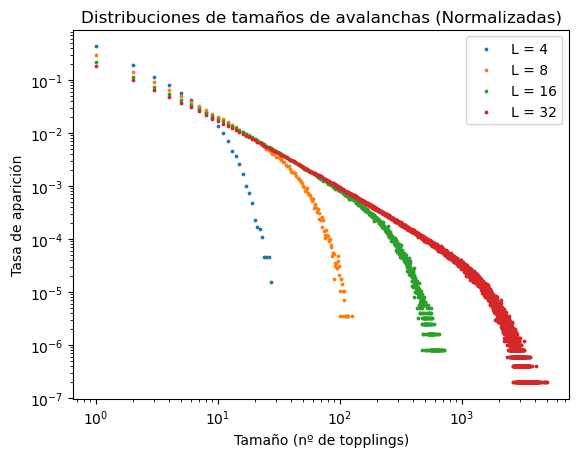

In [3]:
l = [4, 8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=3, label="L = "+str(k))

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de tamaños de avalanchas (Normalizadas)")
plt.xlabel("Tamaño (nº de topplings)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()

Sacamos la pendiente del modelo mas grande L = 32 (TAMAÑOS)

Pendiente: [-1.33856368]
Ord. origen: -0.874946849287709
R^2: 0.9971034617529991


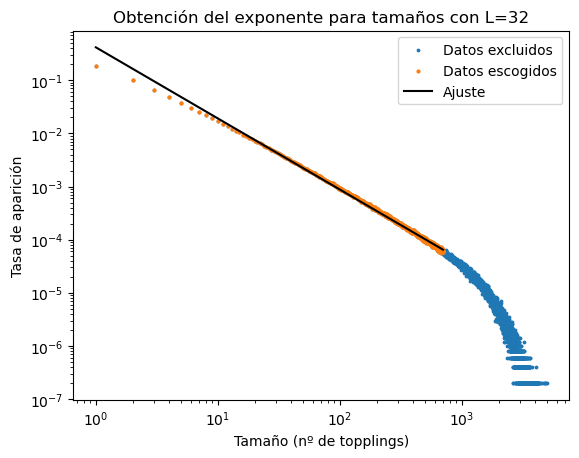

In [4]:
data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]
y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
x = np.linspace(1, y.size, y.size)
plt.scatter(x, y, s=3, label="Datos excluidos")

linRegData = y[0:700]
linRegX = x[0:700]
plt.scatter(linRegX,linRegData, s=4, label="Datos escogidos")

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", regModel.coef_)
print("Ord. origen:", regModel.intercept_)
print("R^2:", regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData)))

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Obtención del exponente para tamaños con L=32")
plt.xlabel("Tamaño (nº de topplings)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()

Graficos para las duraciones de avalancha, columna 3 de los ficheros AdditionData

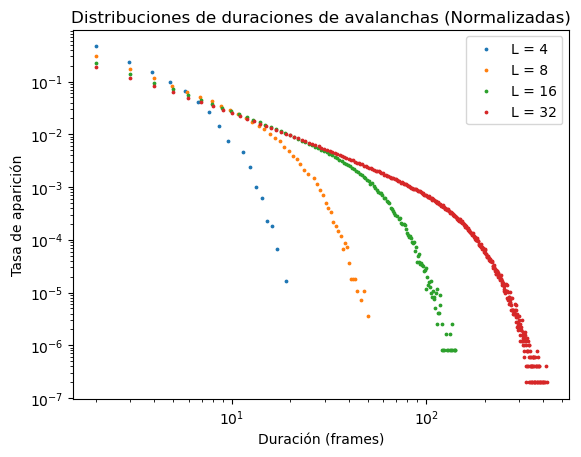

In [7]:
l = [4, 8, 16, 32]
for k in l:
    data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
    x = np.linspace(2, y.size, y.size)
    plt.scatter(x, y, s=3, label="L = "+str(k)) #Powerlaw plot

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de duraciones de avalanchas (Normalizadas)")
plt.xlabel("Duración (frames)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()

Sacamos la pendiente del modelo mas grande L = 32 (DURACIONES)

Pendiente: [-1.22666265]
Ord. origen: -1.1185849009437243
R^2: 0.9874958164875159


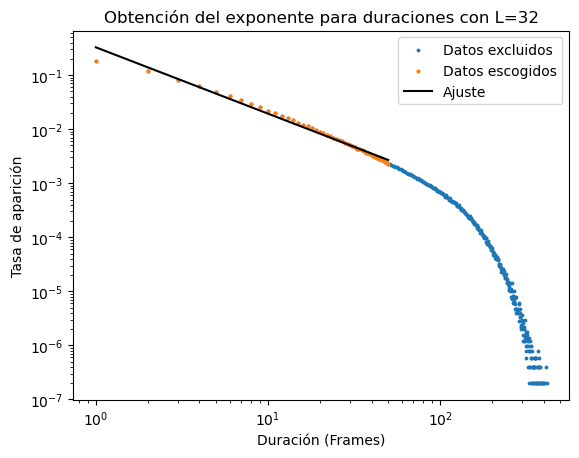

In [ ]:
data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]
y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
x = np.linspace(1, y.size, y.size)
plt.scatter(x, y, s=3, label="Datos excluidos")

linRegData = y[0:50]
linRegX = x[0:50]
plt.scatter(linRegX,linRegData, s=4, label="Datos escogidos")

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", regModel.coef_)
print("Ord. origen:", regModel.intercept_)
print("R^2:", regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData)))

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Obtención del exponente para duraciones con L=32")
plt.xlabel("Duración (Frames)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()

FINITE SIZE SCALING, tamaño medio vs duración

Pendiente: [1.64196554]
Ord. origen: -1.0185212416957778
R^2: 0.9997182521566141


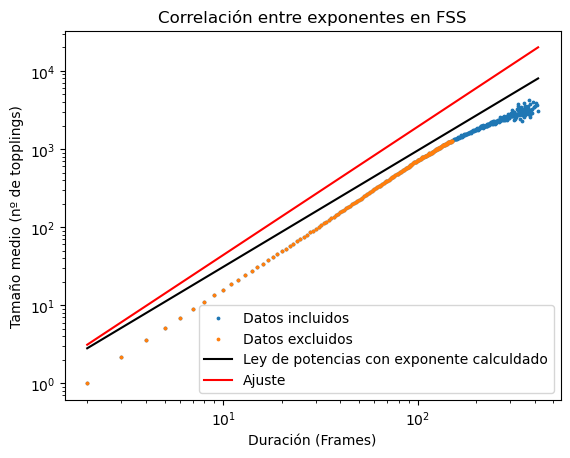

In [ ]:
data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]

t = np.linspace(1, np.max(data[:,2]), np.max(data[:,2]))

#Hago la media de todos los valores de size encontrados para un cierto valor de t, para todos los valores de t
sum = np.zeros(t.size)
counter = np.zeros(t.size)
meanSizes = np.zeros(t.size)

for i in range(0, data[:,0].size):
    sum[data[i,2]-1] = sum[data[i,2]-1] + data[i,1]
    counter[data[i,2]-1] = counter[data[i,2]-1] + 1

for i in range(0, sum.size):
    if counter[i]>0:
        meanSizes[i] = sum[i]/counter[i]
    else: meanSizes[i] = 0

t = t[ meanSizes[:]>0]
meanSizes = meanSizes[ meanSizes[:]>0]
#DATOS EXPERIMENTALES
plt.scatter(t, meanSizes, s=3, label = "Datos incluidos")
plt.scatter(t[0:150], meanSizes[0:150], s=3, label="Datos excluidos")

#LEY DE POTENIAS CON EXPONENTE CALCULADO
plt.plot(t,t**1.49, c="black", label="Ley de potencias con exponente calculdado")

#EXPONENTE CON REGRESIÓN
linRegX = t[0:150]
linRegData = meanSizes[0:150]
regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))
print("Pendiente:", regModel.coef_)
print("Ord. origen:", regModel.intercept_)
print("R^2:", regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData)))
plt.plot(t,t**regModel.coef_, c="red", label="Ajuste")

plt.xscale("log")
plt.yscale("log")
plt.title("Correlación entre exponentes en FSS")
plt.xlabel("Duración (Frames)")
plt.ylabel("Tamaño medio (nº de topplings)")

plt.legend()

FINITE SIZE SCALING, tamaño medio vs duración. SEGUNDO INTENTO, ajusto todos los datos

Pendiente: [1.45912997]
Ord. origen: -0.3362692747075622
R^2: 0.9866327114439665


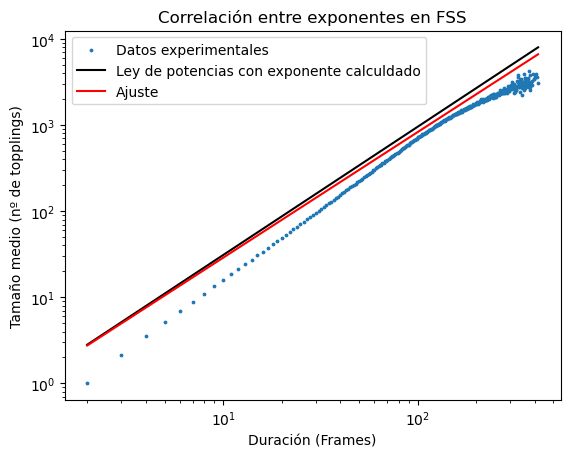

In [ ]:
data = np.loadtxt("Datos\sim001\AdditionData_limit3_statistic10000_32x32.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]

t = np.linspace(1, np.max(data[:,2]), np.max(data[:,2]))

#Hago la media de todos los valores de size encontrados para un cierto valor de t, para todos los valores de t
sum = np.zeros(t.size)
counter = np.zeros(t.size)
meanSizes = np.zeros(t.size)

for i in range(0, data[:,0].size):
    sum[data[i,2]-1] = sum[data[i,2]-1] + data[i,1]
    counter[data[i,2]-1] = counter[data[i,2]-1] + 1

for i in range(0, sum.size):
    if counter[i]>0:
        meanSizes[i] = sum[i]/counter[i]
    else: meanSizes[i] = 0

t = t[ meanSizes[:]>0]
meanSizes = meanSizes[ meanSizes[:]>0]
#DATOS EXPERIMENTALES
plt.scatter(t, meanSizes, s=3, label = "Datos experimentales")

#LEY DE POTENIAS CON EXPONENTE CALCULADO
plt.plot(t,t**1.49, c="black", label="Ley de potencias con exponente calculdado")

#EXPONENTE CON REGRESIÓN
linRegX = t
linRegData = meanSizes
regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))
print("Pendiente:", regModel.coef_)
print("Ord. origen:", regModel.intercept_)
print("R^2:", regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData)))
plt.plot(t,t**regModel.coef_, c="red", label="Ajuste")

plt.xscale("log")
plt.yscale("log")
plt.title("Correlación entre exponentes en FSS")
plt.xlabel("Duración (Frames)")
plt.ylabel("Tamaño medio (nº de topplings)")

plt.legend()